# Tutorial on Identifying Handwriting Digits Using Tensorflow

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Tensor Flow and Keras
import tensorflow as tf

import os
import cv2

# Helper Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Fix the random state of tensorflow.keras model - to get same model training result everytime  
tf.random.set_seed(5)

%matplotlib inline

print (tf.__version__)
print (cv2.__version__)

2.3.1
4.4.0


In [2]:
# Define Image Collaterals
image_path=r'trainingSet/trainingSet'

IMG_WIDTH=28
IMG_HEIGHT=28

In [3]:
# Define Preprocessing Functions here
def create_dataset (image_path):
    img_data_list = []
    img_class_list = []
    img_data_train_list = []
    img_data_test_list = []
    img_class_train_list = []
    img_class_test_list = []
    img_data_disp_train_list = []
    img_data_disp_test_list = []
    img_class_disp_train_list = []
    img_class_disp_test_list = []
    
    for subfolder in os.listdir(image_path):
        for file in os.listdir(os.path.join(image_path, subfolder)):
            img_path = os.path.join(image_path, subfolder, file)
            img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH), interpolation=cv2.INTER_AREA)
            img = np.array(img)
            img = img.astype('float32')
            img /= 255.0
            img_data_list.append(img)
            img_class_list.append(int(subfolder))
        
        full_array_size = len(img_data_list)
        split_array_size = int(full_array_size*0.75)
        
        # Split the dataset
        img_data_train = img_data_list[0:split_array_size-4]
        img_data_disp_train = img_data_list[split_array_size-3:split_array_size]
        img_data_test = img_data_list[split_array_size+1:full_array_size-4]
        img_data_disp_test = img_data_list[full_array_size-3:full_array_size]
        img_class_train = img_class_list[0:split_array_size-4]
        img_class_disp_train = img_class_list[split_array_size-3:split_array_size]
        img_class_test = img_class_list[split_array_size+1:full_array_size-4]
        img_class_disp_test = img_class_list[full_array_size-3:full_array_size]        
        #img_class_train = img_class_list[0:split_array_size]
        #img_class_test = img_class_list[split_array_size+1:]
        
        # Concat list together
        img_data_train_list += img_data_train
        img_data_disp_train_list += img_data_disp_train
        img_data_test_list += img_data_test
        img_data_disp_test_list += img_data_disp_test
        img_class_train_list += img_class_train
        img_class_disp_train_list += img_class_disp_train
        img_class_test_list += img_class_test
        img_class_disp_test_list += img_class_disp_test
        
        # Reinitilize the lists
        img_data_list = []
        img_class_list = []        
        
    # Must convert to numpy array to allow it to be fed into tensorflow
    img_data_train_array = np.array(img_data_train_list)
    img_class_train_array = np.array(img_class_train_list)
    img_class_train_array = img_class_train_array.astype(np.uint8)

    img_data_disp_train_array = np.array(img_data_disp_train_list)
    img_class_disp_train_array = np.array(img_class_disp_train_list)
    img_class_disp_train_array = img_class_disp_train_array.astype(np.uint8)    
    
    img_data_test_array = np.array(img_data_test_list)
    img_class_test_array = np.array(img_class_test_list)
    img_class_test_array = img_class_test_array.astype(np.uint8)

    img_data_disp_test_array = np.array(img_data_disp_test_list)
    img_class_disp_test_array = np.array(img_class_disp_test_list)
    img_class_disp_test_array = img_class_disp_test_array.astype(np.uint8)    
    
    return ((img_data_train_array, img_class_train_array), (img_data_test_array, img_class_test_array), 
           (img_data_disp_train_array, img_class_disp_train_array), (img_data_disp_test_array, img_class_disp_test_array))

# Functions to visualize prediction of images
def plot_image (i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    #plt.imshow(img, cmap=plt.cm.binary)
    plt.imshow(img)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color='blue'
    else:
        color='red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                100*np.max(predictions_array),
                class_names[true_label]),
                color=color)
    
def plot_value_array (i, predictions_array, true_label):
    true_label = true_label[i]
    
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks(np.arange(0, 1.1, 0.1))
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [4]:
((img_train_data, img_train_labels), (img_test_data, img_test_labels),
 (img_train_disp_data, img_train_disp_labels), (img_test_disp_data, img_test_disp_labels)) = create_dataset (image_path)

In [5]:
print("Train Data Size:")
print(len(img_train_data))
print(len(img_train_labels))
print("Test Data Size:")
print(len(img_test_data))
print(len(img_test_labels))
print("Train Display Data Size:")
print(len(img_train_disp_data))
print(len(img_train_disp_labels))
print("Test Display Data Size:")
print(len(img_test_disp_data))
print(len(img_test_disp_labels))

Train Data Size:
31457
31457
Test Data Size:
10453
10453
Train Display Data Size:
30
30
Test Display Data Size:
30
30


In [6]:
print(img_train_disp_labels)
print(img_test_disp_labels)

[9 9 9 0 0 0 7 7 7 6 6 6 1 1 1 8 8 8 4 4 4 3 3 3 2 2 2 5 5 5]
[9 9 9 0 0 0 7 7 7 6 6 6 1 1 1 8 8 8 4 4 4 3 3 3 2 2 2 5 5 5]


In [7]:
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

print (class_names, "-", len(class_names))

['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'] - 10


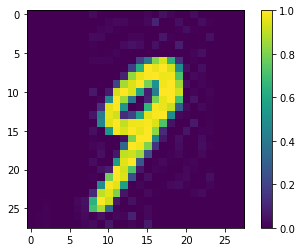

In [8]:
plt.figure()
plt.imshow(img_train_data[0])
plt.colorbar()
plt.show()

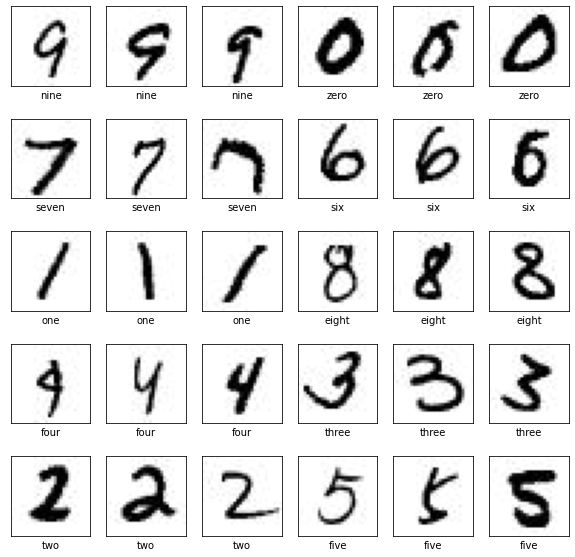

In [9]:
plt.figure(figsize=(10, 10))

for i in range(30):
    plt.subplot(5, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img_train_disp_data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[img_train_disp_labels[i]])

plt.show()

In [10]:
# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [11]:
# Compile the model
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [12]:
# Train the model
model.fit(img_train_data, img_train_labels, epochs=5)

Epoch 1/5
984/984 [==============================] - 1s 1ms/step - loss: 0.3468 - accuracy: 0.9000
Epoch 2/5
984/984 [==============================] - 1s 994us/step - loss: 0.1614 - accuracy: 0.9541
Epoch 3/5
984/984 [==============================] - 1s 1ms/step - loss: 0.1129 - accuracy: 0.9674
Epoch 4/5
984/984 [==============================] - 1s 1ms/step - loss: 0.0829 - accuracy: 0.9747
Epoch 5/5
984/984 [==============================] - 1s 1ms/step - loss: 0.0622 - accuracy: 0.9812


In [13]:
# Evaluate Accuracy
test_loss, test_acc = model.evaluate(img_test_data, img_test_labels, verbose=2)
print("Loss - ", test_loss, "Accuracy - ", test_acc)

327/327 - 0s - loss: 0.0986 - accuracy: 0.9681
Loss -  0.09855050593614578 Accuracy -  0.968143105506897


In [14]:
# Make Predictions
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model(img_test_disp_data)
predictions[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.1636218e-03, 2.0870768e-06, 2.2088536e-06, 6.3538201e-02,
       4.1129190e-04, 1.8345192e-03, 1.2324645e-06, 5.8163144e-04,
       2.9279923e-02, 9.0318531e-01], dtype=float32)>

In [15]:
np.argmax(predictions[0])

9

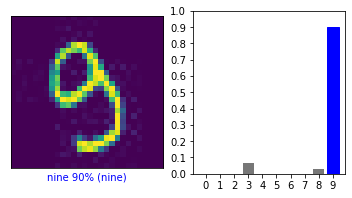

In [16]:
# Verify Predictions
i = 0

plt.figure(figsize=(6, 3)) # Width, Height
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], img_test_disp_labels, img_test_disp_data)
plt.imshow(img_test_disp_data[i])
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], img_test_disp_labels)
plt.show()

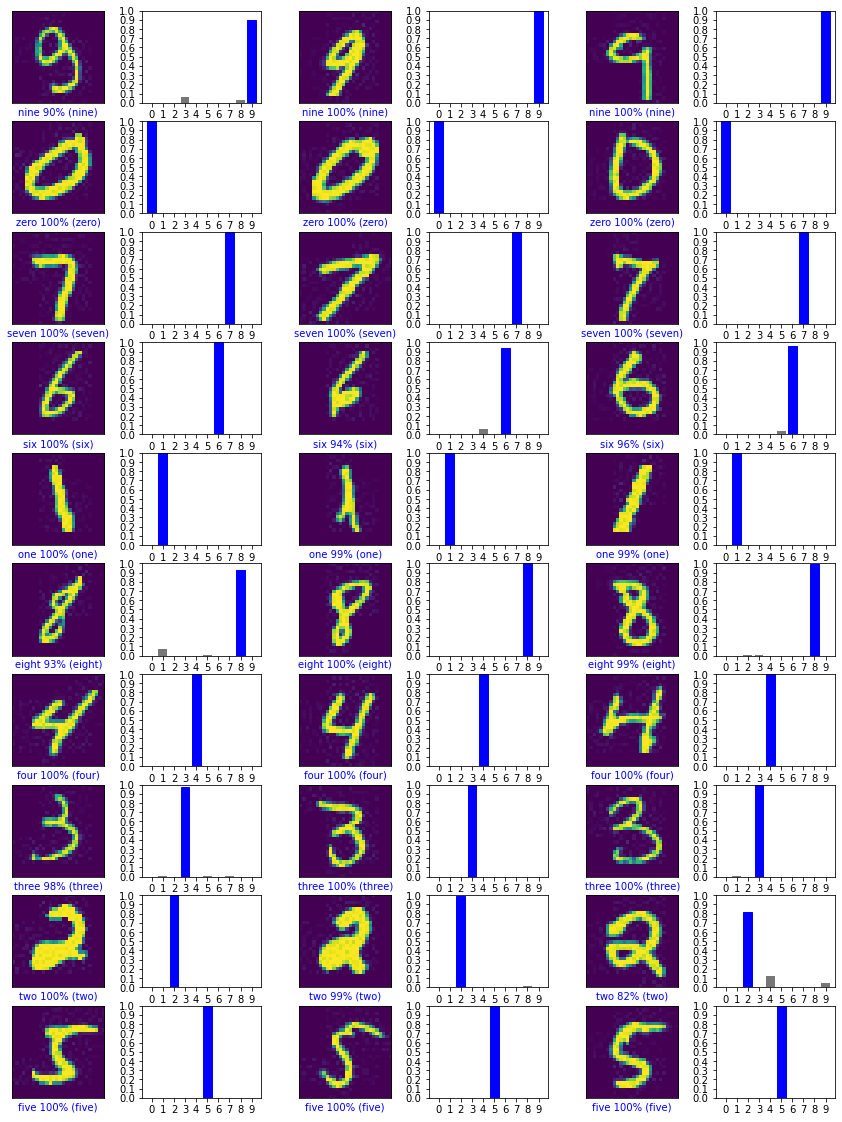

In [17]:
# Verify a few of the predictions images
nrows = 10
ncols = 3

num_images = nrows * ncols

plt.figure(figsize=(15, 20)) # Width, Height

for i in range(num_images):
    plt.subplot(nrows, ncols*2, (i*2)+1)
    plot_image(i, predictions[i], img_test_disp_labels, img_test_disp_data)
    plt.subplot(nrows, ncols*2, (i*2)+2)    
    plot_value_array(i, predictions[i], img_test_disp_labels)

plt.savefig("predicts_display.png")
plt.show()

In [18]:
# Using trained model
img_cnt = 6000

img = img_test_data[img_cnt]
print (img.shape)

# Fit image data into batch
img = (np.expand_dims(img, 0))
print (img.shape)

(28, 28)
(1, 28, 28)


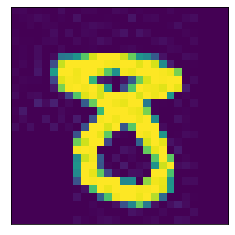

[[4.7777223e-07 1.1399096e-09 1.3714125e-06 2.8411425e-03 6.4875345e-09
  1.5656392e-06 3.8915443e-10 8.6015284e-08 9.9711716e-01 3.8137343e-05]]


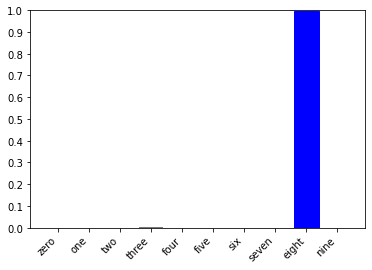

In [19]:
# Predictions of a single image
plt.imshow(img_test_data[img_cnt])
plt.xticks([])
plt.yticks([])
plt.show()

predictions_single = probability_model.predict(img)
print (predictions_single)

plot_value_array(img_cnt, predictions_single[0], img_test_labels)
_ = plt.xticks(range(10), class_names, rotation=45, ha='right')